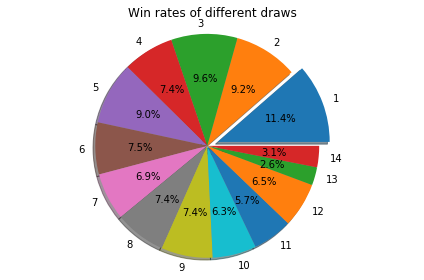

In [2]:
import os
import csv
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


def get_data(name = ''):
    df = ""
    path = os.getcwd()
    direct='data'
    file=os.path.join(path,direct, name)
    #opencsv=""
    try:
        opencsv = open(os.path.join(path,direct,name), 'r')
        #print(opencsv)#find the race-result-horse file
    except:
        while opencsv != name:  # if the file cant be found if there is an error
            print("Could not open ", "file")
            opencsv = input("\nPlease try to open file again: ")
    else:
        with open(os.path.join(path,direct,name)) as f:
            feature_names = []#f.readline()
            #print(feature_names)
            reader = csv.reader(f)
            for row in reader:
                feature_names = row
                #print(feature_names)
                break
            df =  pd.read_csv(open(os.path.join(path,direct,name)), header=None, names = feature_names) #, na_values = ['WV-A' , 'WV'])
            df.drop(0, inplace = True)
    return df

def plot_pie_chart():
    #df_train = get_data('training.csv')
    #df_test = get_data('testing.csv')
    df = get_data('training.csv').reset_index()
    
    draw_label = np.arange(1,15,1)
    
    
    pie_df = pd.DataFrame([] , columns = ['draw_number' , 'win_rate' , 'number_of_wins'])
    count = 0 
    one_ = 0
    
    for i in range(draw_label.shape[0]):
        #print(draw_label[i])
        draw_stat = df[df["draw"]== str(draw_label[i])].loc[:,['finishing_position']]
        no_win = draw_stat[draw_stat["finishing_position"] == '1'].shape[0]
        win_rate = no_win / df[df["finishing_position"] == '1'].shape[0]
        pie_df.loc[i , ['draw_number' , 'win_rate' , 'number_of_wins']] = [draw_label[i] , win_rate , no_win]
        one_ = one_ + win_rate
        #print(win_rate)
        #break
        
    #print(pie_df)
    
    #ax=plt.figure().add_subplot(111, aspect='equal')
    explode = np.zeros(14)
    explode[0] = 0.1
    plt.pie(pie_df.loc[:,['number_of_wins']].values.ravel(), labels=draw_label,explode = explode, autopct='%1.1f%%', shadow=True) #startangle=140)
    
    plt.axis('equal')
    plt.title('Win rates of different draws')
    plt.tight_layout()
    plt.show()
        
    
        
    
    


if __name__ == '__main__':
    
    plot_pie_chart()
   